In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os,sys
import h5py, json
import pickle as pkl
import time

import nept
sys.path.append('../PreProcessing/')
sys.path.append('../TrackingAnalyses/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

from importlib import reload  # Python 3.4+ only.
import TrialAnalyses as TA

In [2]:
oakPaths = {}
oakPaths['Root'] = Path('/mnt/o/giocomo/alexg/')
oakPaths['Clustered'] = Path('/mnt/o/giocomo/alexg/Clustered/')
oakPaths['PreProcessed'] = Path('/mnt/o/giocomo/alexg/PreProcessed/')
oakPaths['Raw'] = Path('/mnt/o/giocomo/alexg/RawData/InVivo/')
oakPaths['Analyses'] = Path('/mnt/o/giocomo/alexg/Analyses')

In [188]:
TA=reload(TA)
task = 'T3g'

animals = ['Cl']
#allDat = {}
overwrite=False
doPlots = False
for animal in animals:

    CT_Path =  oakPaths['Clustered'] / animal / (animal+'_ClusteringSummary.json')
    TrialDat_Fn = oakPaths['Analyses'] / animal / ('{}_{}_TrialAnalysesDat.pkl').format(animal,task)

    with CT_Path.open() as f:
        CT = json.load(f)

    SessionList = []
    SessionPaths = {}
    TrialDat = {}
    cnt=0
    if (not TrialDat_Fn.exists())|True:
        for se,v in CT['Sessions'].items():
            if v:
                temp = se.split('_')
                if temp[1]==task:
                    try:
                        SessionList.append(se)
                        SessionPaths[se]=TA.ZA.getSessionPaths(oakPaths,se)
                        TrialDat[se]=TA.main(se,overwrite=overwrite,doPlots=doPlots)
                    except:
                        print("Error processing session: {}".format(se))
                        print ("Error", sys.exc_info()[0],sys.exc_info()[1],sys.exc_info()[2].tb_lineno)
                    cnt+=1

        TrialDat['Sessions'] = SessionList
        TrialDat['SessionPaths'] = SessionPaths

        with TrialDat_Fn.open(mode='wb') as f:
            pkl.dump(TrialDat,f,pkl.HIGHEST_PROTOCOL)

    else:
        with TrialDat_Fn.open(mode='rb') as f:
            TrialDat = pkl.load(f)
    allDat[animal]=TrialDat


Analyzing Trials from session Cl_T3g_010619
Loading Beh Tracking Data
Complete.
Loading FRs ...
FR Loaded.
Trial Info Dict exists. Loading.
Process Completed. Time 0.21426773071289062s
Trial x Condition Matrix Exists. Loading.
Process Completed. Time 0.10674071311950684s
Trial x Position Long Condition Matrix Exists. Loading.
Process Completed. Time 0.1691441535949707s
Trial x Position Long FiringRate Matrix Exists. Loading.
Process Completed Time 0.17884469032287598s
Trial Model Fits Exists. Loading
Process Completed. Time 0.08498167991638184s

Analyzing Trials from session Cl_T3g_010819
Loading Beh Tracking Data
Complete.
Loading FRs ...
FR Loaded.
Trial Info Dict exists. Loading.
Process Completed. Time 0.1903529167175293s
Trial x Condition Matrix Exists. Loading.
Process Completed. Time 0.08695483207702637s
Trial x Position Long Condition Matrix Exists. Loading.
Process Completed. Time 0.15178847312927246s
Trial x Position Long FiringRate Matrix Exists. Loading.
Process Completed 

In [189]:
modelFits = pd.DataFrame()
unFitSessions = []
missingSessions = []
for an in ['Li','Cl']:
    TD=allDat[an]
    for se in TD['Sessions']:
        if se in TD:
            d = TD[se][4]
            if len(d)>0:
                nUnits = d.shape[0]
                d['se'] = [se]*nUnits
                d['an'] = [an]*nUnits
                modelFits = pd.concat([modelFits,d])
            else:
                unFitSessions.append(se)
        else:
            missingSessions.append(se)

In [190]:
unFitSessions

['Cl_T3g_020519', 'Cl_T3g_020619', 'Cl_T3g_020719']

In [187]:
missingSessions

['Cl_T3g_112118']

In [7]:
modelFits

,ut,FullMod_tR2,modelNum,trainR2,AICc,testR2,Loc:IO,Loc,IO,Cue,Desc,Co,se,an
0,cell,0.037447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li
1,cell,0.236803,31.0,0.510432,1268.457089,0.281341,12.897559,11.169126,5.784192,NaN,NaN,NaN,Li_T3g_052818,Li
2,cell,0.110581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li
3,cell,0.176133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li
4,mua,0.076721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li
5,mua,0.090166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li
6,mua,0.230364,31.0,0.462369,1287.988538,0.242093,14.447389,14.455309,3.517020,NaN,NaN,NaN,Li_T3g_052818,Li
7,mua,0.242430,31.0,0.488156,1215.940284,0.258646,12.140533,13.626188,4.826825,NaN,NaN,NaN,Li_T3g_052818,Li
8,mua,0.024942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li
9,mua,0.102820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li


In [191]:
mods = {}
params = TA.getParamSet()
for k,pp in params.items():
    s =''
    for p in pp:
        s+='-'+p
    mods[k]=s[1:]
selModels = []
for u in modelFits['modelNum']:
    if u>-1:
        selModels.append(mods[int(u)])
    else:
        selModels.append('UnCla')
modelFits['selMod'] = selModels

In [44]:
selModels

['UnCla',
 'Loc:IO-Loc-IO',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO',
 'UnCla',
 'UnCla',
 'UnCla',
 'Loc:IO-Loc-IO-Desc',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO',
 'UnCla',
 'UnCla',
 'UnCla',
 'Loc:IO-Loc-IO-Co',
 'UnCla',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO-Desc',
 'Loc:IO-Loc-IO-Cue',
 'UnCla',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO-Desc',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO',
 'UnCla',
 'Loc:IO-Loc-IO-Desc',
 'UnCla',
 'UnCla',
 'Loc:IO-Loc-IO-Desc',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO',
 'UnCla',
 'UnCla',
 'UnCla',
 'UnCla',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO-Cue-Co',
 'Loc:IO-Loc-IO-Desc',
 'Loc:IO-Loc-IO-Cue-Co',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO',
 'UnCla',
 'UnCla',
 'UnCla',
 'Loc:IO-Loc-IO-Co',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO',
 'Loc:IO-Loc-IO-Co',
 'UnCla',
 'Loc:IO-Loc-IO-Co',
 'Loc:IO-Loc-IO-Desc-Co',
 'Loc:IO-Loc-IO-Desc',
 'Loc:IO-

In [30]:
modelFits

,ut,FullMod_tR2,modelNum,trainR2,AICc,testR2,Loc:IO,Loc,IO,Cue,Desc,Co,se,an,selMod
0,cell,0.037447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
1,cell,0.236803,31.0,0.510432,1268.457089,0.281341,12.897559,11.169126,5.784192,NaN,NaN,NaN,Li_T3g_052818,Li,-Loc:IO-Loc-IO
2,cell,0.110581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
3,cell,0.176133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
4,mua,0.076721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
5,mua,0.090166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
6,mua,0.230364,31.0,0.462369,1287.988538,0.242093,14.447389,14.455309,3.517020,NaN,NaN,NaN,Li_T3g_052818,Li,-Loc:IO-Loc-IO
7,mua,0.242430,31.0,0.488156,1215.940284,0.258646,12.140533,13.626188,4.826825,NaN,NaN,NaN,Li_T3g_052818,Li,-Loc:IO-Loc-IO
8,mua,0.024942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
9,mua,0.102820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla


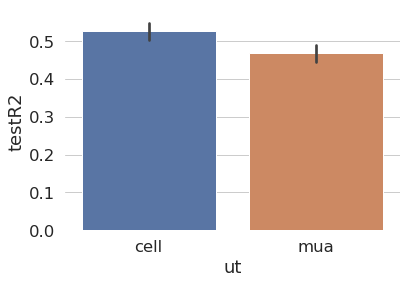

In [192]:
sns.barplot(y='testR2',x='ut',data=modelFits)

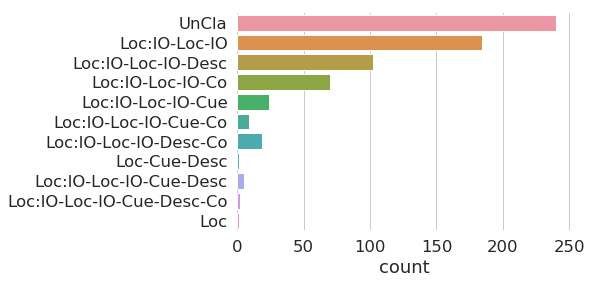

In [193]:
sns.countplot(y=selModels)

In [194]:
nCells = modelFits.shape[0]
pd.Series(selModels).value_counts()/nCells

UnCla                        0.365297
Loc:IO-Loc-IO                0.280061
Loc:IO-Loc-IO-Desc           0.155251
Loc:IO-Loc-IO-Co             0.106545
Loc:IO-Loc-IO-Cue            0.036530
Loc:IO-Loc-IO-Desc-Co        0.028919
Loc:IO-Loc-IO-Cue-Co         0.013699
Loc:IO-Loc-IO-Cue-Desc       0.007610
Loc:IO-Loc-IO-Cue-Desc-Co    0.003044
Loc                          0.001522
Loc-Cue-Desc                 0.001522
dtype: float64

In [195]:
pd.Series(selModels).value_counts()

UnCla                        240
Loc:IO-Loc-IO                184
Loc:IO-Loc-IO-Desc           102
Loc:IO-Loc-IO-Co              70
Loc:IO-Loc-IO-Cue             24
Loc:IO-Loc-IO-Desc-Co         19
Loc:IO-Loc-IO-Cue-Co           9
Loc:IO-Loc-IO-Cue-Desc         5
Loc:IO-Loc-IO-Cue-Desc-Co      2
Loc                            1
Loc-Cue-Desc                   1
dtype: int64

In [196]:
nCells

657

In [182]:
import statsmodels.formula.api as smf
dat =[]
dat = modelFits[~modelFits['modelNum'].isnull()]
md =smf.mixedlm('testR2~ut+selMod',data=dat,groups=dat['se'])
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:                    MixedLM         Dependent Variable:         testR2  
No. Observations:         392             Method:                     REML    
No. Groups:               53              Scale:                      0.0223  
Min. group size:          1               Likelihood:                 146.7387
Max. group size:          21              Converged:                  Yes     
Mean group size:          7.4                                                 
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            0.260    0.156  1.673 0.094 -0.045  0.565
ut[T.mua]                           -0.058    0.016 -3.635 0.000 -0.089 -0.027
selMod[T.Loc-Cue-Desc]               0.013    0.218  0.061 0.951 -0.414  0.441
selMod[T.Loc:IO-Loc-IO]              0.237    0.155  1.531 0.126 -0.066  0.540
selMod[T.Loc:IO-Loc-IO-Co]           0.223    0.156  1.433 0.152 -0.082  0.528
selMod[T.Loc:IO-Loc-IO-Cue]          0.219    0.158  1.387 0.165 -0.091  0.529
selMod[T.Loc:IO-Loc-IO-Cue-Co]       0.312    0.164  1.909 0.056 -0.008  0.633
selMod[T.Loc:IO-Loc-IO-Cue-Desc]     0.242    0.169  1.433 0.152 -0.089  0.572
selMod[T.Loc:IO-Loc-IO-Cue-Desc-Co]  0.228    0.192  1.184 0.236 -0.149  0.605
selMod[T.Loc:IO-Loc-IO-Desc]         0.304    0.155  1.958 0.050 -0.000  0.609
selMod[T.Loc:IO-Loc-IO-Desc-Co]      0.282    0.159  1.772 0.076 -0.030  0.595
Group Var                            0.005    0.014                           
==============================================================================

"""

In [183]:
mdf.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                chi2                 P>chi2  df constraint
Intercept   2.798684    0.09434173258934204              1
ut         13.212694  0.0002780594312808363              1
selMod     23.407869   0.005342461553886505              9

In [ ]:
TrInfo,TrCondMat,TrLongMat,TrFRData, TrModFits

In [169]:
savePath = Path('/mnt/c/Users/alexg8/Documents/Data/Plots/TrialModelAnalyses/')
for an in ['Li','Cl']:
    TD=allDat[an]
    for se in TD['Sessions']:
        if se in TD:
            fitTable = TD[se][4]
            if isinstance(fitTable,pd.core.frame.DataFrame):
                nUnits = fitTable.shape[0]
                x=[]
                for i in np.arange(nUnits):
                    if np.isnan(fitTable['modelNum'][i]):
                        x.append('UnCla')
                    else:
                        x.append(mods[fitTable['modelNum'][i]])
                fitTable['selMod'] = x
                fitTable['se'] = [se]*nUnits
                frDat = TD[se][3]
                trDat = TD[se][2]
                plotLinearTraj2(frDat,trDat,fitTable,savePath)
                plotTrialConds2(frDat,trDat,fitTable,savePath)
               # break
    #break
    

{'cell': 4, 'mua': 12}
cell 1 1 Loc:IO-Loc-IO 0.2813405740553236 Li_T3g_052818

Plotting cell 1 Loc:IO-Loc-IO
mua 2 6 Loc:IO-Loc-IO 0.2420931048052301 Li_T3g_052818

Plotting mua 2 Loc:IO-Loc-IO
mua 3 7 Loc:IO-Loc-IO 0.25864633347896265 Li_T3g_052818

Plotting mua 3 Loc:IO-Loc-IO
mua 7 11 Loc:IO-Loc-IO-Desc 0.30284353438924627 Li_T3g_052818

Plotting mua 7 Loc:IO-Loc-IO-Desc
mua 8 12 Loc:IO-Loc-IO 0.24208525809221537 Li_T3g_052818

Plotting mua 8 Loc:IO-Loc-IO
mua 9 13 Loc:IO-Loc-IO 0.27309447306158796 Li_T3g_052818

Plotting mua 9 Loc:IO-Loc-IO
cell 1 1 Loc:IO-Loc-IO 0.2813405740553236 Li_T3g_052818

Plotting cell 1 Loc:IO-Loc-IO
mua 2 6 Loc:IO-Loc-IO 0.2420931048052301 Li_T3g_052818

Plotting mua 2 Loc:IO-Loc-IO
mua 3 7 Loc:IO-Loc-IO 0.25864633347896265 Li_T3g_052818

Plotting mua 3 Loc:IO-Loc-IO
mua 7 11 Loc:IO-Loc-IO-Desc 0.30284353438924627 Li_T3g_052818

Plotting mua 7 Loc:IO-Loc-IO-Desc
mua 8 12 Loc:IO-Loc-IO 0.24208525809221537 Li_T3g_052818

Plotting mua 8 Loc:IO-Loc-IO
mua 9 

In [134]:
fitTable

,ut,FullMod_tR2,modelNum,trainR2,AICc,testR2,Loc:IO,Loc,IO,Cue,Desc,Co,se,an,selMod
0,cell,0.037447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
1,cell,0.236803,31.0,0.510432,1268.457089,0.281341,12.897559,11.169126,5.784192,NaN,NaN,NaN,Li_T3g_052818,Li,Loc:IO-Loc-IO
2,cell,0.110581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
3,cell,0.176133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
4,mua,0.076721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
5,mua,0.090166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
6,mua,0.230364,31.0,0.462369,1287.988538,0.242093,14.447389,14.455309,3.517020,NaN,NaN,NaN,Li_T3g_052818,Li,Loc:IO-Loc-IO
7,mua,0.242430,31.0,0.488156,1215.940284,0.258646,12.140533,13.626188,4.826825,NaN,NaN,NaN,Li_T3g_052818,Li,Loc:IO-Loc-IO
8,mua,0.024942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
9,mua,0.102820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla


In [158]:
def plotLinearTraj2(frDat,trDat,fitTable,savePath):

    cellColIDs =  [i for i,item in enumerate(frDat.columns.values) if 'cell' in item]
    nCells = len(cellColIDs)
    muaColIDs =  [i for i,item in enumerate(frDat.columns.values) if 'mua' in item]
    nMua = len(muaColIDs)
    nTotalUnits = nCells+nMua
    nUnits = {'cell':nCells,'mua':nMua}
    print(nUnits)
    cellCols = frDat.columns[cellColIDs]
    muaCols = frDat.columns[muaColIDs]
    unitCols = {'cell':cellCols,'mua':muaCols}

    nMaxPos = 11
    nMinPos = 7
    plotAll = False
    
    sns.set()
    sns.set(style="whitegrid",context='notebook',font_scale=1.5,rc={
        'axes.spines.bottom': False,
        'axes.spines.left': False,
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.edgecolor':'0.5'})

    pal = sns.xkcd_palette(['green','purple'])

    cellDat = trDat.copy()
    c_cnt = -1
    for ut in ['cell','mua']:
        for cell in np.arange(nUnits[ut]):
            c_cnt+=1
            if fitTable['selMod'].iloc[c_cnt]!='UnCla':
                sm = fitTable['selMod'].iloc[c_cnt]
                tR2 = fitTable['testR2'].iloc[c_cnt]
                se = fitTable['se'].iloc[c_cnt]
                print(ut,cell,c_cnt,sm,tR2,se)
                
                print('\nPlotting {} {} {}'.format(ut,cell,sm))
    
                cellDat.loc[:,'zFR'] = frDat[unitCols[ut][cell]]

                f,ax = plt.subplots(2,3, figsize=(15,6))
                w = 0.25
                h = 0.43
                ratio = 6.5/10.5
                hsp = 0.05
                vsp = 0.05
                W = [w,w*ratio,w*ratio]
                yPos = [vsp,2*vsp+h]
                xPos = [hsp,1.5*hsp+W[0],2.5*hsp+W[1]+W[0]]
                xlims = [[-0.25,10.25],[3.75,10.25],[-0.25,6.25]]
                for i in [0,1]:
                    for j in np.arange(3):
                        ax[i][j].set_position([xPos[j],yPos[i],W[j],h])
                        ax[i][j].set_xlim(xlims[j])

                xPosLabels = {}
                xPosLabels[0] = ['Home','SegA','Center','SegBE','Int','CDFG','Goals','CDFG','Int','CDFG','Goals']
                xPosLabels[2] = ['Home','SegA','Center','SegBE','Int','CDFG','Goals']
                xPosLabels[1] = xPosLabels[2][::-1]

                alpha=0.15
                mlw = 1
                with sns.color_palette(pal):
                    coSets = ['InCo','Co']
                    for i in [0,1]:
                        if i==0:
                            leg=False
                        else:
                            leg='brief'

                        if plotAll:
                            subset = (cellDat['IO']=='Out') & (cellDat['Co']==coSets[i]) & (cellDat['Valid'])
                            ax[i][0] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',ci=None,data=cellDat[subset],
                                     ax=ax[i][0],legend=False,lw=3,hue_order=['L','R'],style_order=['1','2','3','4'])
                            ax[i][0] = sns.lineplot(x='Pos',y='zFR',hue='Desc',estimator=None,units='trID',data=cellDat[subset],
                                    ax=ax[i][0],legend=False,lw=mlw,alpha=alpha,hue_order=['L','R'])

                            subset = (cellDat['IO']=='In') & (cellDat['Co']==coSets[i]) & (cellDat['Pos']>=4) & (cellDat['Valid'])
                            ax[i][1] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',ci=None,data=cellDat[subset],
                                     ax=ax[i][1],legend=False,lw=3,hue_order=['L','R'],style_order=['1','2','3','4'])
                            ax[i][1] = sns.lineplot(x='Pos',y='zFR',hue='Cue',estimator=None,units='trID',data=cellDat[subset],
                                    ax=ax[i][1],legend=False,lw=mlw,alpha=alpha,hue_order=['L','R'])

                            subset = (cellDat['IO']=='O_I') & (cellDat['Co']==coSets[i])& (cellDat['Valid'])
                            ax[i][2] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',ci=None,data=cellDat[subset],
                                        ax=ax[i][2],legend=leg,lw=3,hue_order=['L','R'],style_order=['1','2','3','4'])
                            ax[i][2] = sns.lineplot(x='Pos',y='zFR',hue='Cue',estimator=None,units='trID',data=cellDat[subset],
                                         ax=ax[i][2],legend=False,lw=mlw,alpha=alpha,hue_order=['L','R'])

                        else:
                            subset = (cellDat['IO']=='Out') & (cellDat['Co']==coSets[i]) & (cellDat['Valid'])
                            ax[i][0] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',data=cellDat[subset],
                                                  ax=ax[i][0],lw=2,legend=False,hue_order=['L','R'],style_order=['1','2','3','4'])
                            subset = (cellDat['IO']=='In') & (cellDat['Co']==coSets[i]) & (cellDat['Pos']>=4) & (cellDat['Valid'])
                            ax[i][1] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',data=cellDat[subset],
                                                 ax=ax[i][1],lw=2,legend=False,hue_order=['L','R'],style_order=['1','2','3','4'])
                            subset = (cellDat['IO']=='O_I') & (cellDat['Co']==coSets[i])& (cellDat['Valid'])
                            ax[i][2] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',data=cellDat[subset],
                                                 ax=ax[i][2],legend=leg,lw=2,hue_order=['L','R'],style_order=['1','2','3','4'])

                        ax[i][1].set_xticks(np.arange(4,nMaxPos))
                        ax[i][0].set_xticks(np.arange(nMaxPos))
                        ax[i][2].set_xticks(np.arange(nMinPos))

                        for j in np.arange(3):
                            ax[i][j].set_xlabel('')
                            ax[i][j].set_ylabel('')
                            ax[i][j].tick_params(axis='x', rotation=60)

                        ax[i][0].set_ylabel('{} zFR'.format(coSets[i]))
                        ax[i][1].set_yticklabels('')

                        if i==0:
                            for j in np.arange(3):
                                ax[i][j].set_xticklabels(xPosLabels[j])
                        else:
                            ax[i][0].set_title('Out')
                            ax[i][1].set_title('In')
                            ax[i][2].set_title('O-I')
                            for j in np.arange(3):
                                ax[i][j].set_xticklabels('')
                    l =ax[1][2].get_legend()
                    plt.legend(bbox_to_anchor=(1.05, 0), loc=6, borderaxespad=0.,frameon=False)
                    l.set_frame_on(False)

                    # out/in limits
                    lims = np.zeros((4,2))
                    cnt =0
                    for i in [0,1]:
                        for j in [0,1]:
                            lims[cnt]=np.array(ax[i][j].get_ylim())
                            cnt+=1
                    minY = np.floor(np.min(lims[:,0])*20)/20
                    maxY = np.ceil(np.max(lims[:,1]*20))/20
                    for i in [0,1]:
                        for j in [0,1]:
                            ax[i][j].set_ylim([minY,maxY])

                    # o-i limits
                    lims = np.zeros((2,2))
                    cnt =0
                    for i in [0,1]:
                        lims[cnt]=np.array(ax[i][2].get_ylim())
                        cnt+=1
                    minY = np.floor(np.min(lims[:,0])*20)/20
                    maxY = np.ceil(np.max(lims[:,1]*20))/20
                    for i in [0,1]:
                        ax[i][2].set_ylim([minY,maxY])
                    
                    txtstr = 'SelMod \n{0} \n\n tR2={1:.2f}'.format(sm,tR2)
                    f.text(0.7,0.15,txtstr,fontsize=10)
                    
                    sp = savePath/sm
                    sp.mkdir(parents=True,exist_ok=True)
                    
                    fn = 'LinearizedTr_{}_{}_ID-{}.jpeg'.format(se,ut,cell)
                    f.savefig(str(sp/fn),dpi=150, bbox_inches='tight',pad_inches=0.2)
                    plt.close(f)


In [168]:
def plotTrialConds2(frDat,trDat,fitTable,savePath):

    cellColIDs =  [i for i,item in enumerate(frDat.columns.values) if 'cell' in item]
    nCells = len(cellColIDs)
    muaColIDs =  [i for i,item in enumerate(frDat.columns.values) if 'mua' in item]
    nMua = len(muaColIDs)
    nTotalUnits = nCells+nMua
    nUnits = {'cell':nCells,'mua':nMua}

    cellCols = frDat.columns[cellColIDs]
    muaCols = frDat.columns[muaColIDs]
    unitCols = {'cell':cellCols,'mua':muaCols}

    sns.set()
    sns.set(style="whitegrid",context='notebook',font_scale=1.5,rc={
        'axes.spines.bottom': False,
        'axes.spines.left': False,
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.edgecolor':'0.5'})

    cellDat = trDat.copy()
    c_cnt = -1
    for ut in ['cell','mua']:
        for cell in np.arange(nUnits[ut]):
            c_cnt+=1
            if fitTable['selMod'].iloc[c_cnt]!='UnCla':
                sm = fitTable['selMod'].iloc[c_cnt]
                tR2 = fitTable['testR2'].iloc[c_cnt]
                se = fitTable['se'].iloc[c_cnt]
                print(ut,cell,c_cnt,sm,tR2,se)
                
                print('\nPlotting {} {} {}'.format(ut,cell,sm))
                
                cellDat.loc[:,'zFR'] = frDat[unitCols[ut][cell]]

                f,ax = plt.subplots(1,2, figsize=(10,4))

                # Correct Trials Out/In O_I
                subset = cellDat['Co']=='Co'
                dat =[]
                dat = cellDat[subset].groupby(['trID','IO','Cue','Desc']).mean()
                dat = dat.reset_index()

                pal = sns.xkcd_palette(['spring green','light purple'])
                with sns.color_palette(pal):
                    ax[0]=sns.violinplot(y='zFR',x='IO',hue='Desc',data=dat,split=True, ax=ax[0],
                                      scale='count',inner='quartile',hue_order=['L','R'],saturation=0.5,order=['Out','In','O_I'])
                pal = sns.xkcd_palette(['emerald green','medium purple'])
                with sns.color_palette(pal):
                    ax[0]=sns.swarmplot(y='zFR',x='IO',hue='Desc',data=dat,dodge=True,hue_order=['L','R'],alpha=0.7,ax=ax[0],
                                     edgecolor='gray',order=['Out','In','O_I'])
                l=ax[0].get_legend()
                l.set_visible(False)
                ax[0].set_xlabel('Direction')

                #
                subset= cellDat['IO']=='Out'
                dat = []
                dat = cellDat[subset].groupby(['trID','Cue','Co','Desc']).mean()
                dat = dat.reset_index()

                pal = sns.xkcd_palette(['spring green','light purple'])
                with sns.color_palette(pal):
                    ax[1]=sns.violinplot(y='zFR',x='Desc',hue='Cue',data=dat,split=True,scale='width',ax=ax[1],
                                      inner='quartile',order=['L','R'],hue_order=['L','R'],saturation=0.5)
                pal = sns.xkcd_palette(['emerald green','medium purple'])
                with sns.color_palette(pal):
                    ax[1]=sns.swarmplot(y='zFR',x='Desc',hue='Cue',data=dat,dodge=True,order=['L','R'],ax=ax[1],
                                        hue_order=['L','R'],alpha=0.7,edgecolor='gray')

                #
                ax[1].set_xlabel('Decision')
                ax[1].set_ylabel('')
                l=ax[1].get_legend()
                handles, labels = ax[1].get_legend_handles_labels()
                l.set_visible(False)
                plt.legend(handles[2:],labels[2:],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0.,frameon=False,title='Cue')

                
                txtstr = 'SelMod \n{0} \n\n tR2={1:.2f}'.format(sm,tR2)
                f.text(0.9,0.65,txtstr,fontsize=10)
                
                sp = savePath/sm
                sp.mkdir(parents=True,exist_ok=True)

                fn = 'TrialConds_{}_{}_ID-{}.jpeg'.format(se,ut,cell)
                f.savefig(str(sp/fn),dpi=150, bbox_inches='tight',pad_inches=0.2)
                plt.close(f)
